In [55]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [56]:
#read the csv file
df=pd.read_csv("kc_house_data.csv")

In [57]:
#read first 5 rows
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [58]:
#read last 5 rows
df.tail(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [59]:
#describe the data(statistical analysis)
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [61]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There is no missing values so no need to handle them

In [40]:
#the id,date, column no need for analysis so drop it
df=df.drop(['id','date','yr_built','yr_renovated', 'zipcode'],axis=1)


In [41]:
df.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,47.6168,-122.045,1800,7503


<AxesSubplot:>

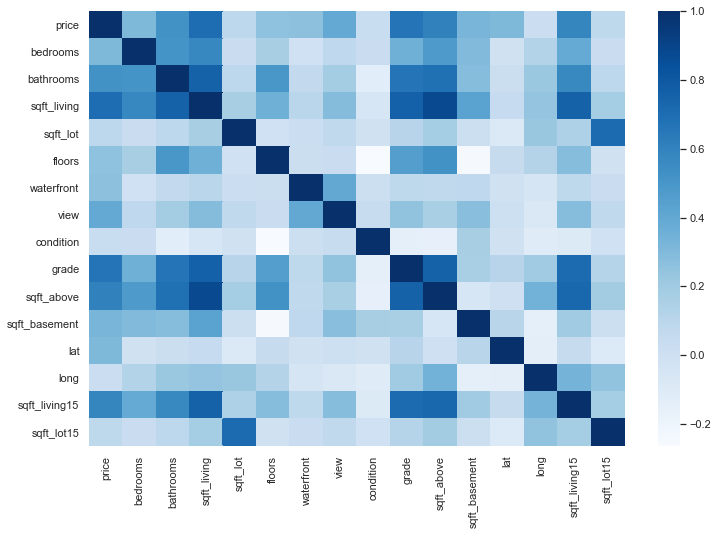

In [42]:
# Explore which numeric columns have high linear correlation
corr_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='Blues')

In [43]:
#Pearson's Correlation Coefficient: helps you find out the relationship between two quantities. 
#It gives you the measure of the strength of association between two variables. 
#The value of Pearson's Correlation Coefficient can be between -1 to +1. 
#1 means that they are highly correlated and 0 means no correlation.

In [44]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.114084,0.198372,0.713202,0.119248


Ditribution of data

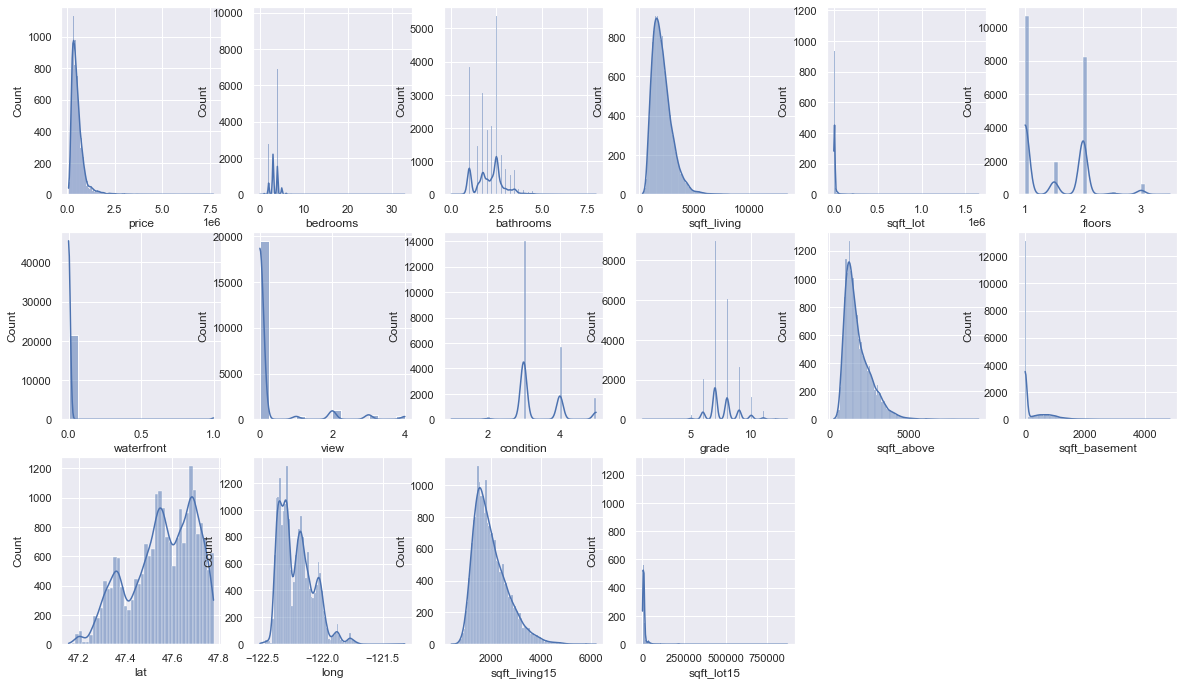

In [45]:
plt.figure(figsize = (20, 20))
sns.set(style="darkgrid")
plotnumber = 1

for column in df:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.histplot(df[column],kde=True)
        plt.xlabel(column)
        
    plotnumber += 1

plt.show()

Text(0.5, 1.0, 'condition variable count')

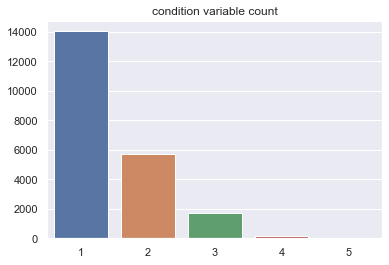

In [46]:
count = df['condition'].value_counts().values
sns.barplot(x = [1,2,3,4,5], y = count)
plt.title('condition variable count')

In [16]:
count = df['condition'].value_counts().values
count

array([14031,  5679,  1701,   172,    30], dtype=int64)

Text(0.5, 1.0, 'grade')

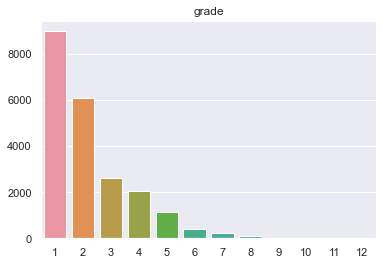

In [17]:
count = df['grade'].value_counts().values
sns.barplot(x = [1,2,3,4,5,6,7,8,9,10,11,12], y = count)
plt.title('grade')

In [18]:
count = df['grade'].value_counts().values
count

array([8981, 6068, 2615, 2038, 1134,  399,  242,   90,   29,   13,    3,
          1], dtype=int64)

In [19]:
count = df['bedrooms'].value_counts().values
count

array([9824, 6882, 2760, 1601,  272,  199,   38,   13,   13,    6,    3,
          1,    1], dtype=int64)

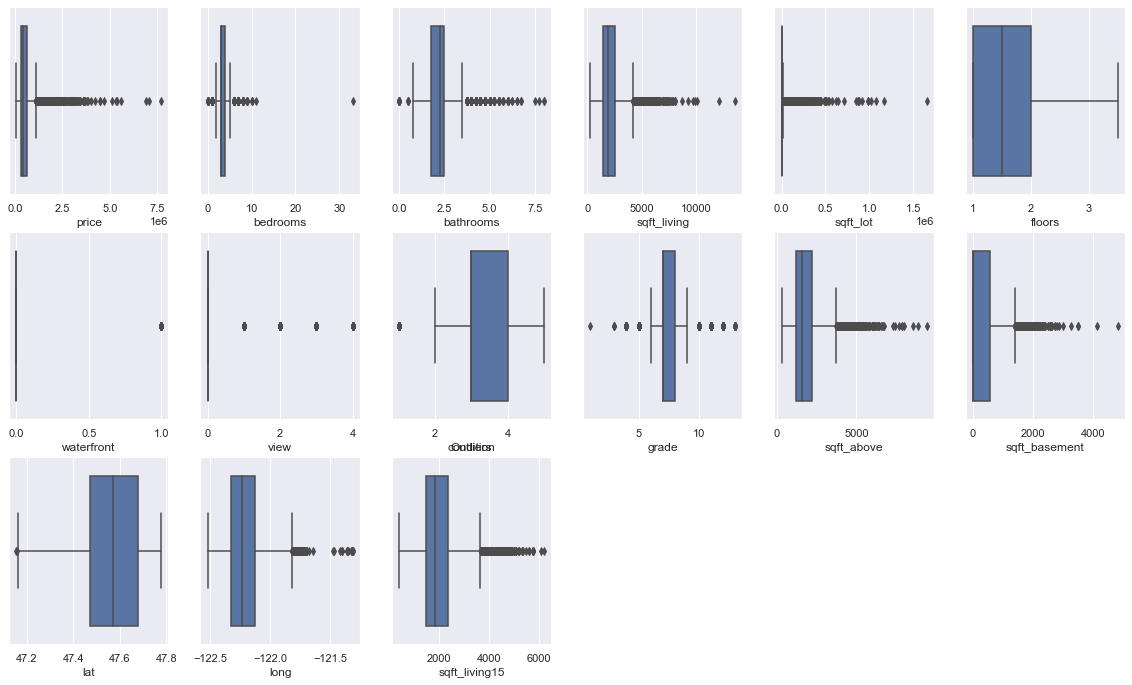

In [20]:
plt.figure(figsize = (20, 20))
plotnumber = 1

for column in df:
    if plotnumber <= 15:
        ax = plt.subplot(5, 6, plotnumber)
        sns.boxplot(x=df[column])
        plt.xlabel(column)
        
    plotnumber += 1
plt.title("Outliers")
plt.show()

In [20]:
#For each k value , we will initialise k-means and use 
#the interia attribute to identify sum of squared distance of 
#samples to the nearest cluster center

sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters = k) #in each iteration create a model with clusters = k
    km.fit(df[['view','condition']])
    sse.append(km.inertia_)#Interia will give the sse

In [21]:
sse

[21843.445703968348,
 10512.732871785864,
 3674.959106254858,
 2508.046036415958,
 1653.5486945466766,
 1223.4120758078654,
 972.1682262125339,
 655.6844363419749,
 496.7450884843705]

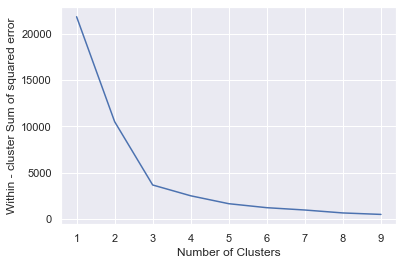

In [22]:
plt.xlabel('Number of Clusters')
plt.ylabel('Within - cluster Sum of squared error') 
plt.plot(k_rng,sse)

In [23]:
#Initialize the clusters
km = KMeans(5)

In [24]:
km

KMeans(n_clusters=5)

In [25]:
from sklearn.preprocessing import MinMaxScaler

Text(0, 0.5, 'bathrooms')

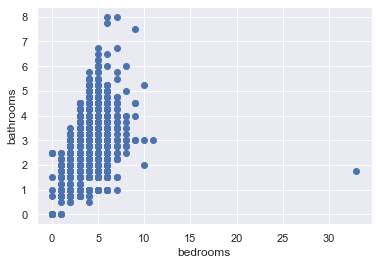

In [26]:
plt.scatter(df['bedrooms'],df['bathrooms'])
plt.xlabel('bedrooms')
plt.ylabel('bathrooms')

Text(0, 0.5, 'long')

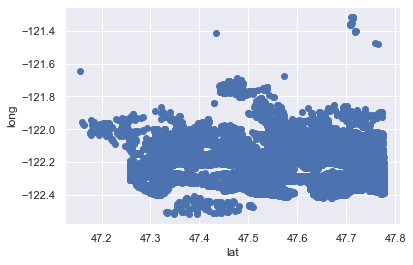

In [27]:
plt.scatter(df['lat'],df['long'])
plt.xlabel('lat')
plt.ylabel('long')

Text(0, 0.5, 'sqft_lot')

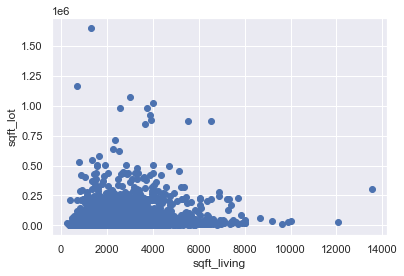

In [28]:
plt.scatter(df['sqft_living'],df['sqft_lot'])
plt.xlabel('sqft_living')
plt.ylabel('sqft_lot')

In [29]:
y_predicted=km.fit_predict(df[['bedrooms','bathrooms']])
y_predicted

array([4, 2, 1, ..., 1, 2, 1])

In [31]:
df['Cluster']=y_predicted
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,Cluster
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,47.5112,-122.257,1340,5650,4
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,47.7210,-122.319,1690,7639,2
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,47.7379,-122.233,2720,8062,1
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,47.5208,-122.393,1360,5000,3
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,47.6168,-122.045,1800,7503,2


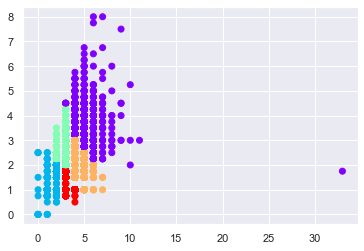

In [32]:
plt.scatter(df['bedrooms'],df['bathrooms'],c=df['Cluster'],cmap='rainbow')

In [33]:
scaler=MinMaxScaler()

scaler.fit(df[['bathrooms']])
df['bathrooms']=scaler.transform(df[['bathrooms']])
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,Cluster
0,221900.0,3,0.12500,1180,5650,1.0,0,0,3,7,1180,0,47.5112,-122.257,1340,5650,4
1,538000.0,3,0.28125,2570,7242,2.0,0,0,3,7,2170,400,47.7210,-122.319,1690,7639,2
2,180000.0,2,0.12500,770,10000,1.0,0,0,3,6,770,0,47.7379,-122.233,2720,8062,1
3,604000.0,4,0.37500,1960,5000,1.0,0,0,5,7,1050,910,47.5208,-122.393,1360,5000,3
4,510000.0,3,0.25000,1680,8080,1.0,0,0,3,8,1680,0,47.6168,-122.045,1800,7503,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,0.31250,1530,1131,3.0,0,0,3,8,1530,0,47.6993,-122.346,1530,1509,2
21609,400000.0,4,0.31250,2310,5813,2.0,0,0,3,8,2310,0,47.5107,-122.362,1830,7200,3
21610,402101.0,2,0.09375,1020,1350,2.0,0,0,3,7,1020,0,47.5944,-122.299,1020,2007,1
21611,400000.0,3,0.31250,1600,2388,2.0,0,0,3,8,1600,0,47.5345,-122.069,1410,1287,2


In [34]:
scaler.fit(df[['bedrooms']])
df['bedrooms']=scaler.transform(df[['bedrooms']])
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,Cluster
0,221900.0,0.090909,0.12500,1180,5650,1.0,0,0,3,7,1180,0,47.5112,-122.257,1340,5650,4
1,538000.0,0.090909,0.28125,2570,7242,2.0,0,0,3,7,2170,400,47.7210,-122.319,1690,7639,2
2,180000.0,0.060606,0.12500,770,10000,1.0,0,0,3,6,770,0,47.7379,-122.233,2720,8062,1
3,604000.0,0.121212,0.37500,1960,5000,1.0,0,0,5,7,1050,910,47.5208,-122.393,1360,5000,3
4,510000.0,0.090909,0.25000,1680,8080,1.0,0,0,3,8,1680,0,47.6168,-122.045,1800,7503,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,0.090909,0.31250,1530,1131,3.0,0,0,3,8,1530,0,47.6993,-122.346,1530,1509,2
21609,400000.0,0.121212,0.31250,2310,5813,2.0,0,0,3,8,2310,0,47.5107,-122.362,1830,7200,3
21610,402101.0,0.060606,0.09375,1020,1350,2.0,0,0,3,7,1020,0,47.5944,-122.299,1020,2007,1
21611,400000.0,0.090909,0.31250,1600,2388,2.0,0,0,3,8,1600,0,47.5345,-122.069,1410,1287,2


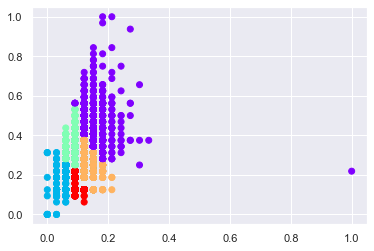

In [35]:
plt.scatter(df['bedrooms'],df['bathrooms'],c=df['Cluster'],cmap='rainbow')

In [36]:
km=KMeans(5)
y_predicted=km.fit_predict(df[['bedrooms','bathrooms']])
y_predicted

array([1, 0, 1, ..., 1, 0, 1])

In [37]:
df['Cluster']=y_predicted
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,Cluster
0,221900.0,0.090909,0.12500,1180,5650,1.0,0,0,3,7,1180,0,47.5112,-122.257,1340,5650,1
1,538000.0,0.090909,0.28125,2570,7242,2.0,0,0,3,7,2170,400,47.7210,-122.319,1690,7639,0
2,180000.0,0.060606,0.12500,770,10000,1.0,0,0,3,6,770,0,47.7379,-122.233,2720,8062,1
3,604000.0,0.121212,0.37500,1960,5000,1.0,0,0,5,7,1050,910,47.5208,-122.393,1360,5000,4
4,510000.0,0.090909,0.25000,1680,8080,1.0,0,0,3,8,1680,0,47.6168,-122.045,1800,7503,3


In [38]:
km.cluster_centers_

array([[0.10859964, 0.3093427 ],
       [0.07920389, 0.12413722],
       [0.1461764 , 0.5583902 ],
       [0.09737462, 0.22110555],
       [0.12363093, 0.41017377]])

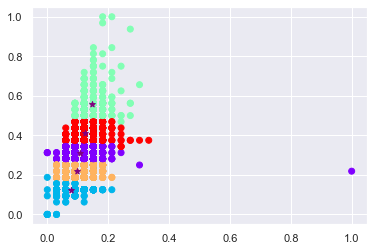

In [39]:
plt.scatter(df['bedrooms'],df['bathrooms'],c=df['Cluster'],cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centrold')